In [9]:
%matplotlib notebook

import serial
import warnings
warnings.filterwarnings('ignore')
import sys

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
    

In [10]:
def serial_init(speed):
    dev = serial.Serial(
        # Здесь указывается устройство, с которым будет производится работа
        # /dev/ttyUSBx - для Linux
        # /dev/tty.SLAB_USBtoUART - для MacOS
        port='/dev/ttyUSB0', 
        # Скорость передачи
        baudrate=speed,
        # Использование бита четности
        parity=serial.PARITY_NONE,
        # Длина стоп-бита
        stopbits=serial.STOPBITS_ONE,
        # Длина пакета
        bytesize=serial.EIGHTBITS,
        # Максимальное время ожидания устройства
        timeout=0.01
    )
    return dev

def serial_recv(dev):
    # Для простоты макс. кол-во символов для чтения - 255. Время ожидания - 0.1
    # decode необходим для конвертирования набора полученных байтов в строку
    string = dev.read(255).decode()
    return string

def serial_send(dev, string):
    # encode конвертирует строку в кодировке utf-8 в набор байтов 
    dev.write(string.encode('utf-8'))


<IPython.core.display.Javascript object>


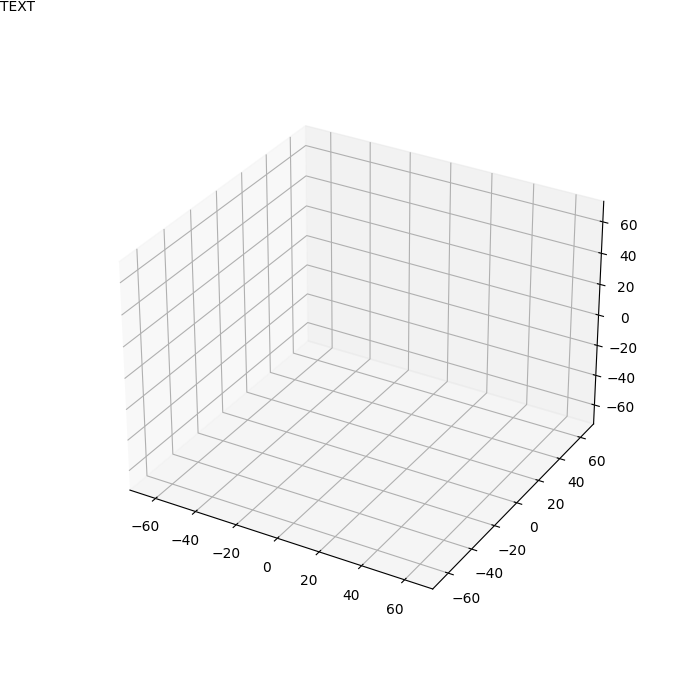

In [11]:
#####################################
# Animation of the map construction #
#####################################

# Initialization the serial port
dev = serial_init(115200)

# This function is to update the graph 
def update_lines(num):
    
    # Start to read line from serial
    state = dev.readline()
    
    # If the end of data 
    if(state == b'*'):
        dev.close()
        return
    
    # If the state has smth 
    if(state != b''): 
        
        # Decode the line and split it by ','
        line = (state.decode("utf-8")).split(',')
        
        # Get coordinates 
        dx, dy, dz = [int(item) for item in line]
        
        # For debugging
        text.set_text("{:d}: [{:.0f},{:.0f},{:.0f}]".format(num, dx, dy, dz))
        
        # Append all coordinates to lists
        x.append(dx)
        y.append(dy)
        z.append(dz)
        
        # plot just new points
        graph._offsets3d = (x, y, z)
        return graph,

# Initialize new empthy lists
x = []
y = []
z = []

# Initialize the figure 
fig = plt.figure(figsize=(7, 7))

# Add an Axes to the current figure
ax = fig.add_subplot(111, projection="3d")

# Plot the point
graph = ax.scatter(x, y, z, color = 'orange', linewidth = 0.5)

# Write coordinates for debugging
text = fig.text(0, 1, "TEXT", va='top')

# Restrict the construction area
ax.set_xlim3d(-70, 70)
ax.set_ylim3d(-70, 70)
ax.set_zlim3d(-70, 70)

# Creating the Animation object
ani = animation.FuncAnimation(fig, update_lines, frames=1000, interval=1, blit=True)
plt.show()


<IPython.core.display.Javascript object>


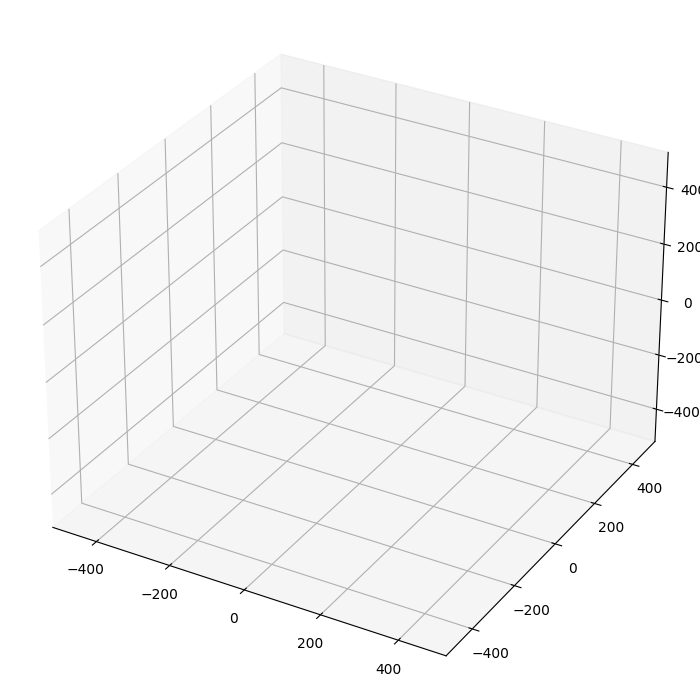

In [12]:
#######################
# Just to plot the graph #
#######################

# Initialize the figure 
fig = plt.figure(figsize = (7,7))

# Initialization the area for plotting
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Plot points
ax.scatter(x, y, z, c = z, cmap='plasma', linewidth = 0.5);

# Restrict the construction area
ax.set_xlim3d(-500, 500)
ax.set_ylim3d(-500, 500)
ax.set_zlim3d(-500, 500)

plt.show()